In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import numpy as np #importing required libraries

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data(). #loading dataset


print("train_images shape : ", train_images.shape)
print("train_labels shape : ", train_labels.shape) 
print("test_images shape : ", test_images.shape)
print("test_labels shape : ", test_labels.shape)

train_images shape :  (60000, 28, 28)
train_labels shape :  (60000,)
test_images shape :  (10000, 28, 28)
test_labels shape :  (10000,)


Displaying train index =  8319
train label [8319] = 1 
------------ raw data for train_image[8319] -------
--------------------


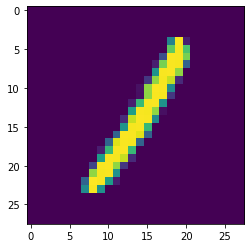

In [ ]:
%matplotlib inline   # Data visualization
import matplotlib.pyplot as plt
import random

index = random.randint(0, len(train_images))
# index = 10
print ("Displaying train index = ", index)

print("train label [{}] = {} ".format(index, train_labels[index]))
print ("------------ raw data for train_image[{}] -------".format(index))
#print(train_images[index])
print ("--------------------")

plt.imshow(train_images[index])
plt.show()

In [ ]:
### Create pipeline: Scale the vectors to 0-1 from 0-255 range
train_images  = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [ ]:
## One Hot Encoding
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')  #build a model
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print (model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:

epochs= 30
print ("training starting ...")      #Getting the Model Ready For Training

history = model.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_split=0.2,
    verbose=1,
   #callbacks=[early_stopping_monitor]
)

print ("training done.")      

training starting ...
Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.1751 - val_accuracy: 0.9762
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.1607 - val_accuracy: 0.9774
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.2144 - val_accuracy: 0.9728
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0068 - accuracy: 0.9977 - val_loss: 0.1738 - val_accuracy: 0.9765
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0080 - accuracy: 0.9977 - val_loss: 0.1687 - val_accuracy: 0.9779
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0055 - accuracy: 0.9983 - val_loss: 0.2109 - val_accuracy: 0.9728
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0100 - accuracy: 0.9972 - val_loss: 

In [ ]:
scores = model.evaluate(test_images, test_labels, verbose=0)

In [ ]:
print(scores)

[0.46729663014411926, 0.9821000099182129]


In [ ]:
predicted = model.predict_classes(test_images, batch_size = 32, verbose = 1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
313/313 [==============================] - 0s 909us/step


In [ ]:
test_labels[1]

2

In [ ]:
predicted[1]

2

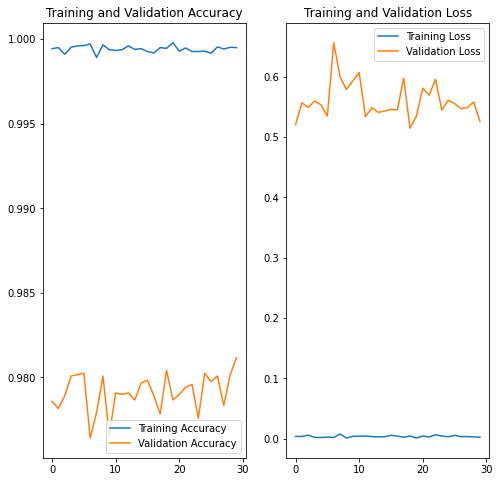

In [ ]:
training_accuracy = history.history['accuracy']      #learning curves
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(len(training_accuracy))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
predictions = model.predict(test_images)

predictions2 = [ np.argmax(p) for p in predictions]

In [ ]:
from sklearn.metrics import classification_report     # precision
from pprint import pprint

pprint(classification_report(test_labels, predictions2, output_dict=True))

{'0': {'f1-score': 0.9892911779704233,
       'precision': 0.9887869520897044,
       'recall': 0.9897959183673469,
       'support': 980},
 '1': {'f1-score': 0.9925011027790032,
       'precision': 0.9938162544169611,
       'recall': 0.9911894273127754,
       'support': 1135},
 '2': {'f1-score': 0.9806576402321083,
       'precision': 0.9787644787644788,
       'recall': 0.9825581395348837,
       'support': 1032},
 '3': {'f1-score': 0.9748644652538196,
       'precision': 0.9705593719332679,
       'recall': 0.9792079207920792,
       'support': 1010},
 '4': {'f1-score': 0.98419173890872,
       'precision': 0.9856996935648621,
       'recall': 0.9826883910386965,
       'support': 982},
 '5': {'f1-score': 0.9776035834266517,
       'precision': 0.9765100671140939,
       'recall': 0.9786995515695067,
       'support': 892},
 '6': {'f1-score': 0.9884937238493724,
       'precision': 0.9905660377358491,
       'recall': 0.9864300626304802,
       'support': 958},
 '7': {'f1-score': 

**Accuracy: 98.2 & precision: 98.2**

**Trying to increase the accuracy:** 


In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [5]:
training_set, dataset_info = tfds.load('mnist', split = 'train', as_supervised = True, with_info = True)

test_data, dataset_info1 = tfds.load('mnist', split = 'test', as_supervised = True, with_info=True)
dataset_info

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.



Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

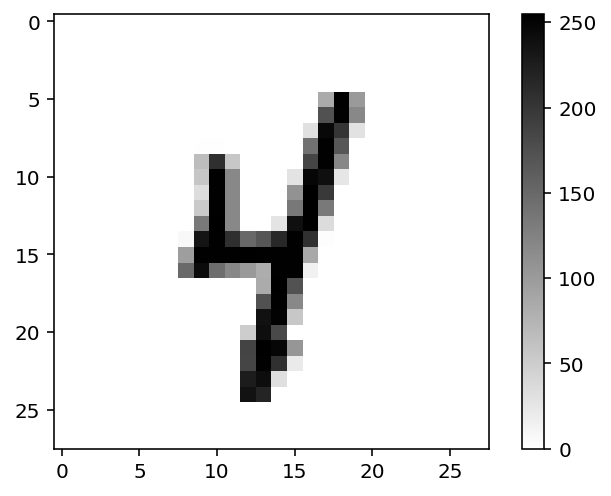

The label of this image is: 4


In [6]:
for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()
    
# Plot the image
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.show()

print('The label of this image is:', label)

In [7]:
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label

num_training_examples = dataset_info.splits['train'].num_examples

batch_size = 64

training_batches = training_set.cache().shuffle(num_training_examples//4).batch(batch_size).map(normalize).prefetch(1)

In [8]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
])

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
for image_batch, label_batch in training_batches.take(1):
    loss, accuracy = model.evaluate(image_batch, label_batch)

print('\nLoss before training: {:,.3f}'.format(loss))
print('Accuracy before training: {:.3%}'.format(accuracy))

2/2 [==============================] - 0s 4ms/step - loss: 2.2819 - accuracy: 0.1094

Loss before training: 2.282
Accuracy before training: 10.938%


In [11]:
EPOCHS = 5

history = model.fit(training_batches, epochs = EPOCHS)

Epoch 1/5
938/938 [==============================] - 9s 10ms/step - loss: 0.2755 - accuracy: 0.9215
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1132 - accuracy: 0.9653
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0790 - accuracy: 0.9758
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0590 - accuracy: 0.9815
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0469 - accuracy: 0.9858


Finally, the accuracy is 98.5%

With our model trained, we can check out it's predictions:

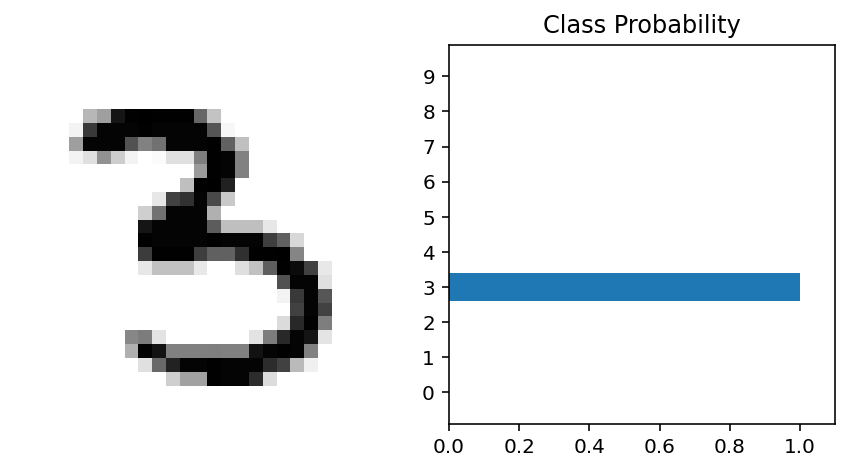

In [12]:
for image_batch, label_batch in training_batches.take(1):
    ps = model.predict(image_batch)
    first_image = image_batch.numpy().squeeze()[0]
  
  
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(first_image, cmap = plt.cm.binary)
ax1.axis('off')
ax2.barh(np.arange(10), ps[0])
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()
